In [2]:
import os
from glob import glob
import re 
import math
from pathlib import Path 
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.metrics as skm
from tqdm.auto import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
import mne
mne.set_log_level(verbose=False)

from Datasets import *

from utils_folder.callbacks import *
from utils_folder.training_pth import *
from utils_folder.plotting import *
from utils_folder.utils import get_labels_and_preds

# Data Exploration using MNE

In this notebook we will try to explore the data we have and understand how do filtering and downsampling affect our data. This is important because everything points to our data as the main source of problems.

## Data loading
We will be loading the first ```.edf``` file to begin with.

In [5]:
path = "/media/usbdisk/data/ProyectoPSG/data/PSG1.edf"

In [5]:
dataset = EDFData_PTH(path)
dataset.epochs

Number of events,882
Events,Sleep stage N1: 25Sleep stage N2: 317Sleep stage N3: 193Sleep stage R: 101Sleep stage W: 246
Time range,0.000 – 29.998 sec
Baseline,off


In [6]:
raw_data = mne.io.read_raw_edf(path)
raw_data

<RawEDF | PSG1.edf, 50 x 13569536 (26503.0 s), ~51 kB, data not loaded>

In [8]:
plt.ion()

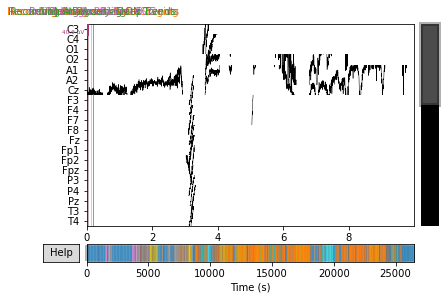

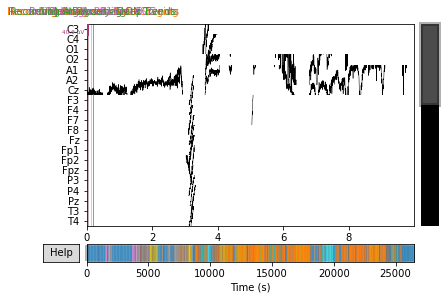

In [9]:
raw_data.plot()

## Filtering

The doctor gave us some filters to work with, but we should check how they affect our data. A nice way of doing it might by through visual analysis.